In [13]:
### basic
import pandas as pd
import numpy as np
import copy

###sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
###plot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [14]:
pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.4.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.1.1
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.6
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.0
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==3.4.8
cufflinks==0.17.3
cvxopt==1.3.1
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1

In [15]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.4.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.1.1
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.6
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.0
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==3.4.8
cufflinks==0.17.3
cvxopt==1.3.1
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1

Read in data

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
### https://drive.google.com/file/d/1e2z2mVkAhRvZ9JGcTuJFg99mvJwoQdyv/view?usp=sharing
file_id = '1e2z2mVkAhRvZ9JGcTuJFg99mvJwoQdyv'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
df = pd.read_csv(url)

In [18]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [19]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
df.shape

(1338, 7)

Data cleaning

In [21]:
#LabelEncoder for string columns
target_columns = ['sex', 'smoker']
label_encoders = {}
for column in target_columns:
    label_encoders[column] = LabelEncoder()
    # Fit
    df[column] = label_encoders[column].fit_transform(df[column])

# df['charges'] = np.log(df['charges'])

char_scaler = StandardScaler().fit(df[['charges']])
df['charges_scaled'] = char_scaler.transform(df[['charges']])

bmi_scaler = StandardScaler().fit(df[['bmi']])
df['bmi_scaled'] = bmi_scaler.transform(df[['bmi']])

chi_scaler = StandardScaler().fit(df[['children']])
df['children_scaled'] = chi_scaler.transform(df[['children']])

In [22]:
ohe_region = OneHotEncoder()
region = ohe_region.fit(df[['region']])

for region_lab, num in zip(ohe_region.categories_[0], range(0,4)):
  df[region_lab] = region.transform(df[['region']]).toarray()[:,num]


In [23]:
df

,age,sex,bmi,children,smoker,region,charges,charges_scaled,bmi_scaled,children_scaled,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.298584,-0.453320,-0.908614,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,-0.953689,0.509621,-0.078767,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,-0.728675,0.383307,1.580926,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.719843,-1.305531,-0.908614,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,-0.776802,-0.292556,-0.908614,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,-0.220551,0.050297,1.580926,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,-0.914002,0.206139,-0.908614,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,-0.961596,1.014878,-0.908614,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,-0.930362,-0.797813,-0.908614,0.0,0.0,0.0,1.0


In [24]:
# df = df[df.bmi<np.percentile(df.bmi, 97.5)]

In [25]:
df

,age,sex,bmi,children,smoker,region,charges,charges_scaled,bmi_scaled,children_scaled,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.298584,-0.453320,-0.908614,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,-0.953689,0.509621,-0.078767,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,-0.728675,0.383307,1.580926,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.719843,-1.305531,-0.908614,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,-0.776802,-0.292556,-0.908614,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,-0.220551,0.050297,1.580926,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,-0.914002,0.206139,-0.908614,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,-0.961596,1.014878,-0.908614,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,-0.930362,-0.797813,-0.908614,0.0,0.0,0.0,1.0


Visualization

<ipython-input-26-e5d7260e96dc>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'], color="m", axlabel='SalePrice')


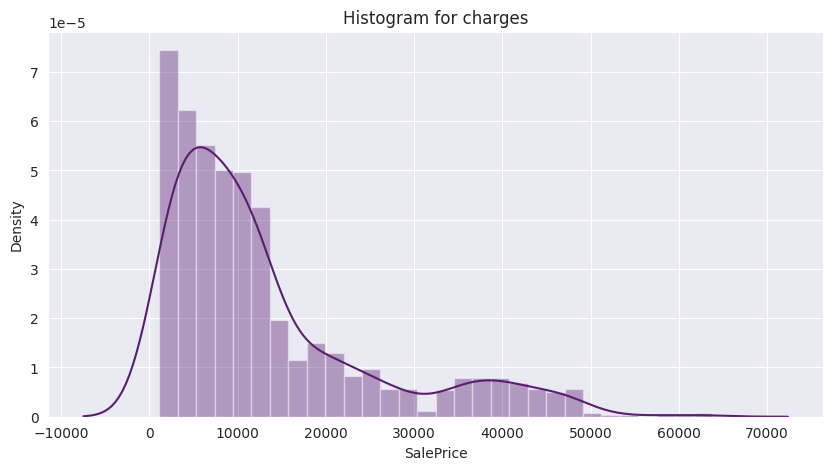

In [26]:

### hist plot
sns.set_style('darkgrid')
sns.set_color_codes(palette='dark')
f, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df['charges'], color="m", axlabel='SalePrice')
ax.set(title="Histogram for charges")
plt.show()

<ipython-input-27-90e12b736af1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


<Axes: >

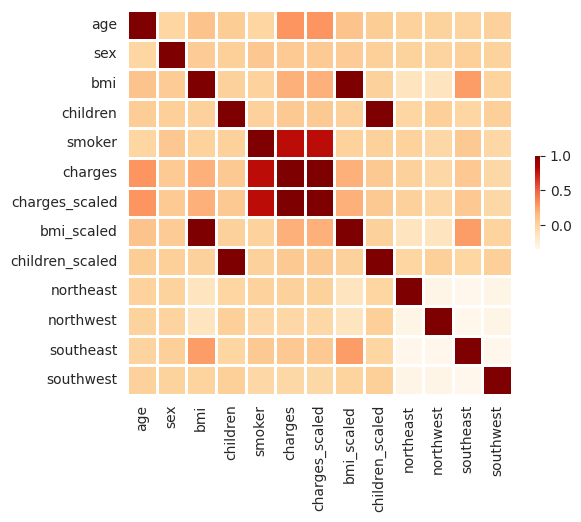

In [27]:
# Calc correlation matrix
corr_mat = df.corr()

# Set plot size
plt.subplots(figsize=(6,5))

# Plot heatmap
sns.heatmap(corr_mat,
            square=True,
            robust=True,
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1) # space between cells

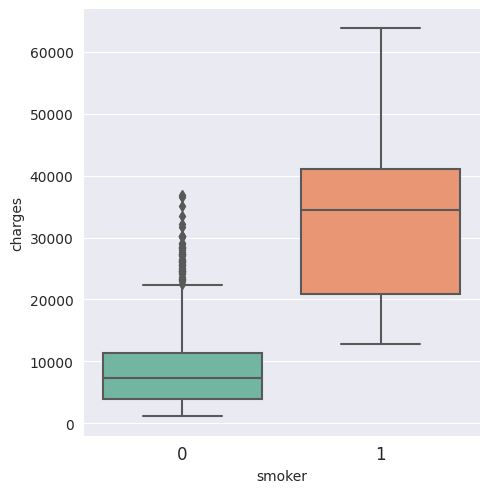

In [28]:
# Creating a boxplot for smoker and charges, as they have the highest correclation

chart = sns.catplot(data = df ,
                    x = 'smoker',
                    y='charges',
                    kind='box',
                    palette='Set2', height=5, aspect=1)

chart.set_xticklabels(fontweight='light',fontsize='large')
plt.show()

train test split

In [29]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_scaled', 'bmi_scaled', 'children_scaled', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [30]:
# X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], df['charges'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi_scaled', 'children_scaled', 'smoker',
        'northwest', 'southeast', 'southwest']], df['charges_scaled'], test_size=0.2, random_state=42)

Create voting model

In [31]:
def fast_rmse_score(score):
    rmse = np.mean(np.sqrt(score**2))
    return rmse

In [32]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train), linear_reg.coef_)

0.7417255854683333 [ 2.12280389e-02 -1.53580725e-03  1.69748264e-01  4.23344352e-02
  1.95375310e+00 -3.06206093e-02 -5.43443156e-02 -6.68952426e-02]


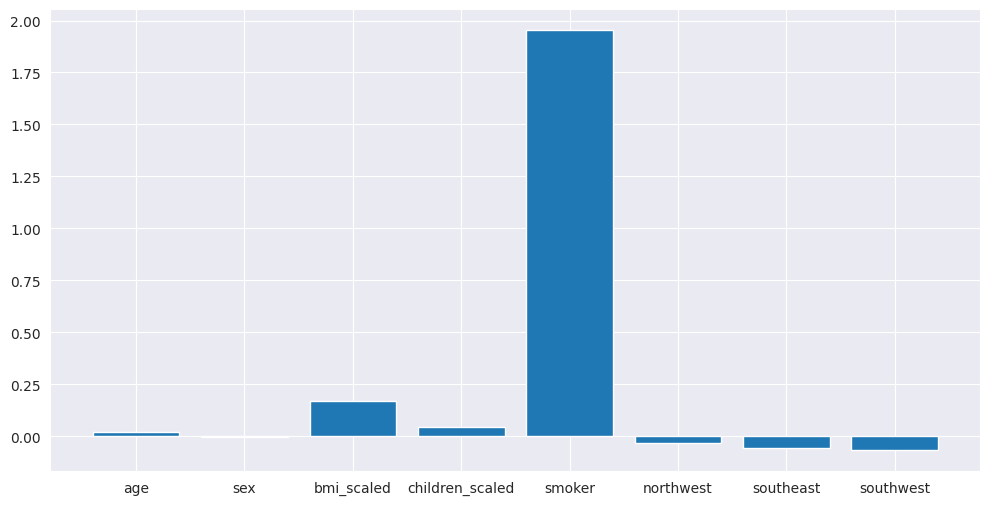

In [44]:
# import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
fig, ax = plt.subplots()

ax.bar(X_train.columns, linear_reg.coef_)

plt.show()
# st.pyplot(fig)

In [33]:
linear_reg.coef_

array([ 2.12280389e-02, -1.53580725e-03,  1.69748264e-01,  4.23344352e-02,
        1.95375310e+00, -3.06206093e-02, -5.43443156e-02, -6.68952426e-02])

In [34]:
y_pred = linear_reg.predict(X_test)

result_lin = copy.deepcopy(X_test)

result_lin['Predict_charge'] = char_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
result_lin['Ground_True_charge'] = char_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

result_lin['Diff_Pred_GT'] = result_lin['Predict_charge'] - result_lin['Ground_True_charge']
result_lin['ape'] = np.abs((result_lin['Ground_True_charge'] - result_lin['Predict_charge']) / result_lin['Ground_True_charge']) * 100

<Axes: xlabel='Predict_charge', ylabel='Ground_True_charge'>

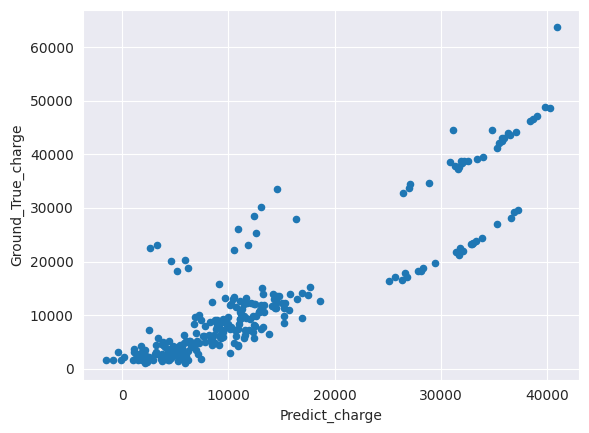

In [ ]:
result_lin.plot.scatter(x='Predict_charge', y='Ground_True_charge')

In [ ]:
# MSE
mse = mean_squared_error(result_lin['Ground_True_charge'], result_lin['Predict_charge'])

# RMSE
rmse = mean_squared_error(result_lin['Ground_True_charge'], result_lin['Predict_charge'], squared=False)

# MAE
mae = mean_absolute_error(result_lin['Ground_True_charge'], result_lin['Predict_charge'])

# R-squared (R2)
r2 = r2_score(result_lin['Ground_True_charge'], result_lin['Predict_charge'])

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((result_lin['Ground_True_charge'] - result_lin['Predict_charge']) / result_lin['Ground_True_charge'])) * 100

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")


MSE: 33596915.85
RMSE: 5796.28
MAE: 4181.19
R-squared: 0.78
MAPE: 46.89%


In [ ]:
import joblib
filename = 'linear_regression_trained.pkl'

with open(filename,'wb') as f :
    joblib.dump(linear_reg,f)

Voting regressor

In [ ]:
# linear_reg = LinearRegression()
# decision_tree_reg = DecisionTreeRegressor()
# svr = SVR(kernel='linear')

In [ ]:
# #SVR
# svr = SVR()
# params_svr = {
#     'kernel': ['poly', 'linear'],
#     'degree': [5,8]
# }
# grid_svr = GridSearchCV(estimator = svr,
#                        param_grid = params_svr,
#                        scoring ='neg_mean_squared_error',
#                        cv = 3,
#                        verbose = 1,
#                        n_jobs = 3)
# grid_svr.fit(X_train, y_train)
# best_svr = grid_svr.best_estimator_

In [ ]:
# # Lets look at the Cross Validation score for SVM
# print('CV Score for best SVM model: {:.2f}'.format(fast_rmse_score(grid_svr.best_score_)))

In [ ]:
dtr = DecisionTreeRegressor()

params_svr={"splitter":["best"],
            "max_depth" : [7,9,11,12],
           "max_features":["auto","log2","sqrt",None],
          }

grid_dtr = GridSearchCV(estimator = dtr,
                       param_grid = params_svr,
                       scoring ='neg_mean_squared_error',
                       cv = 3,
                       verbose = 1,
                       n_jobs = 3)

grid_dtr.fit(X_train, y_train)
best_dtr = grid_dtr.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
print('Score for best dtr model: {:.2f}'.format(fast_rmse_score(grid_dtr.best_score_)))

Score for best dtr model: 0.22


In [ ]:
# RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

params_rf = {
    'n_estimators': [500,1000],
    'max_depth': [10,15]
}

grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       scoring ='neg_mean_squared_error',
                       cv = 3,
                       verbose = 1,
                       n_jobs = -1)
# fit the model
grid_rf.fit(X_train, y_train)
best_RF = grid_rf.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
print('Score for best rfr model: {:.2f}'.format(fast_rmse_score(grid_rf.best_score_)))

Score for best rfr model: 0.17


In [ ]:
#Gradient Boosting Regressor
gbr = GradientBoostingRegressor(subsample = 0.9,
                                max_features = 0.75,
                                random_state = 42,
                                warm_start = True,
                                learning_rate= 0.01)


params_gbr = {
    'n_estimators': [8000],
    'max_depth': [2,3],
    'min_samples_split':[5],
}

grid_gbr = GridSearchCV(estimator = gbr,
                       param_grid = params_gbr,
                       scoring ='neg_mean_squared_error',
                       cv = 3,
                       verbose = 1,
                       n_jobs = -1)

grid_gbr.fit(X_train, y_train)
best_GBR = grid_gbr.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [ ]:
print('CV Score for best GradientBoostingRegressor model: {:.2f}'.format(fast_rmse_score(grid_gbr.best_score_)))

CV Score for best GradientBoostingRegressor model: 0.17


In [ ]:
print(np.mean(np.abs((y_test - grid_dtr.predict(X_test)) / y_test)) * 100,
      np.mean(np.abs((y_test - grid_rf.predict(X_test)) / y_test)) * 100,
      np.mean(np.abs((y_test - grid_gbr.predict(X_test)) / y_test)) * 100)

86.81344036770322 54.831170514161144 69.0437844867278


In [ ]:
voting_reg = VotingRegressor([
    ('dtr', best_dtr),
    ('rf', best_RF),
    ('gbr', best_GBR)
])

In [ ]:
voting_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


VotingRegressor(estimators=[('dtr',
                             DecisionTreeRegressor(max_depth=7,
                                                   max_features='auto')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       max_depth=2,
                                                       max_features=0.75,
                                                       min_samples_split=5,
                                                       n_estimators=8000,
                                                       random_state=42,
                                                       subsample=0.9,
                                                       warm_start=True))])

In [ ]:
voting_reg.get_params()

{'estimators': [('dtr',
   DecisionTreeRegressor(max_depth=7, max_features='auto')),
  ('rf',
   RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)),
  ('gbr',
   GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features=0.75,
                             min_samples_split=5, n_estimators=8000,
                             random_state=42, subsample=0.9, warm_start=True))],
 'n_jobs': None,
 'verbose': False,
 'weights': None,
 'dtr': DecisionTreeRegressor(max_depth=7, max_features='auto'),
 'rf': RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42),
 'gbr': GradientBoostingRegressor(learning_rate=0.01, max_depth=2, max_features=0.75,
                           min_samples_split=5, n_estimators=8000,
                           random_state=42, subsample=0.9, warm_start=True),
 'dtr__ccp_alpha': 0.0,
 'dtr__criterion': 'squared_error',
 'dtr__max_depth': 7,
 'dtr__max_features': 'auto',
 'dtr__max_leaf_nodes': None,
 'dtr__min_impurity

Predict

In [ ]:
y_pred = voting_reg.predict(X_test)

In [ ]:
result = copy.deepcopy(X_test)

### return back to labels
for column in target_columns:
    result[column] = label_encoders[column].inverse_transform(X_test[column])

In [ ]:

# result['Predict_charge'] = np.exp(y_pred)
# result['Ground_True_charge'] = np.exp(y_test)

# result['Predict_charge'] = y_pred
# result['Ground_True_charge'] = y_test

result['Predict_charge'] = char_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
result['Ground_True_charge'] = char_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

result['Diff_Pred_GT'] = result['Predict_charge'] - result['Ground_True_charge']
result['ape'] = np.abs((result['Ground_True_charge'] - result['Predict_charge']) / result['Ground_True_charge']) * 100

In [ ]:
result[result['ape'] > 10]

,age,sex,bmi_scaled,children_scaled,smoker,northwest,southeast,southwest,Predict_charge,Ground_True_charge,Diff_Pred_GT,ape
764,45,female,-0.900341,0.751079,no,0.0,0.0,0.0,11212.482016,9095.06825,2117.413766,23.280900
1293,46,male,-0.806836,1.580926,no,1.0,0.0,0.0,10678.588174,9301.89355,1376.694624,14.800155
1312,34,male,2.007347,-0.078767,no,0.0,0.0,1.0,6787.292756,4536.25900,2251.033756,49.623131
899,19,female,-1.336700,-0.908614,no,1.0,0.0,0.0,2435.411006,2117.33885,318.072156,15.022260
1286,28,female,-2.193832,-0.908614,no,0.0,0.0,0.0,5533.836785,3732.62510,1801.211685,48.255896
...,...,...,...,...,...,...,...,...,...,...,...,...
168,19,female,0.190555,-0.078767,no,1.0,0.0,0.0,4520.508325,2719.27975,1801.228575,66.239179
858,25,female,0.256993,-0.078767,no,0.0,1.0,0.0,4842.940060,18218.16139,-13375.221330,73.416966
1270,26,male,0.533408,-0.078767,no,1.0,0.0,0.0,5652.348192,3292.52985,2359.818342,71.671889
54,40,female,-0.323725,1.580926,no,1.0,0.0,0.0,7028.642786,8059.67910,-1031.036314,12.792523


In [ ]:
# MSE
mse = mean_squared_error(result['Ground_True_charge'], result['Predict_charge'])

# RMSE
rmse = mean_squared_error(result['Ground_True_charge'], result['Predict_charge'], squared=False)

# MAE
mae = mean_absolute_error(result['Ground_True_charge'], result['Predict_charge'])

# R-squared (R2)
r2 = r2_score(result['Ground_True_charge'], result['Predict_charge'])

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((result['Ground_True_charge'] - result['Predict_charge']) / result['Ground_True_charge'])) * 100

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")


MSE: 20861810.37
RMSE: 4567.47
MAE: 2528.41
R-squared: 0.87
MAPE: 30.61%


ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_scaled', 'bmi_scaled', 'children_scaled', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], df['charges'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df[['age', 'sex', 'bmi', 'children', 'smoker',
#         'northwest', 'southeast', 'southwest']], df['charges'], test_size=0.2, random_state=42)

In [ ]:
# Create the Keras Sequential model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=8))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 50)                7550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 38,351
Trainable params: 38,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.2)


Epoch 1/50
43/43 [==============================] - 1s 5ms/step - loss: 1.4999 - val_loss: 1.0902
Epoch 2/50
43/43 [==============================] - 0s 2ms/step - loss: 0.9991 - val_loss: 0.9610
Epoch 3/50
43/43 [==============================] - 0s 2ms/step - loss: 0.8857 - val_loss: 0.9820
Epoch 4/50
43/43 [==============================] - 0s 2ms/step - loss: 0.8669 - val_loss: 0.7303
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 0.6291 - val_loss: 0.5553
Epoch 6/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4568 - val_loss: 0.3322
Epoch 7/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4173 - val_loss: 0.3734
Epoch 8/50
43/43 [==============================] - 0s 2ms/step - loss: 0.4927 - val_loss: 0.2563
Epoch 9/50
43/43 [==============================] - 0s 2ms/step - loss: 0.3458 - val_loss: 0.2608
Epoch 10/50
43/43 [==============================] - 0s 2ms/step - loss: 0.3780 - val_loss: 0.2661
Epoch 11/50
43/43 [

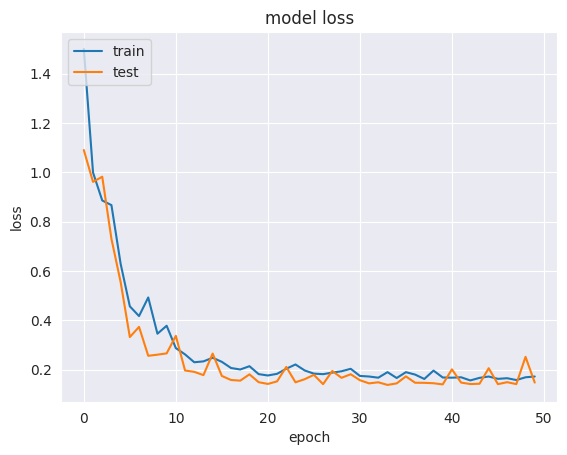

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [ ]:
result_ann = copy.deepcopy(X_test)
# result_ann['Predict_charge'] = np.exp(y_pred)
# result_ann['Ground_True_charge'] = np.exp(y_test)

# result_ann['Predict_charge'] = np.exp(char_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1)))
# result_ann['Ground_True_charge'] = np.exp(char_scaler.inverse_transform(np.array(y_test).reshape(-1, 1)))

result_ann['Predict_charge'] = char_scaler.inverse_transform(np.array(y_pred).reshape(-1, 1))
result_ann['Ground_True_charge'] = char_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))

result_ann['Diff_Pred_GT'] = result_ann['Predict_charge'] - result_ann['Ground_True_charge']
result_ann['ape'] = np.abs((result_ann['Ground_True_charge'] - result_ann['Predict_charge']) / result_ann['Ground_True_charge']) * 100

In [ ]:
# MSE
mse = mean_squared_error(result_ann['Ground_True_charge'], result_ann['Predict_charge'])

# RMSE
rmse = mean_squared_error(result_ann['Ground_True_charge'], result_ann['Predict_charge'], squared=False)

# MAE
mae = mean_absolute_error(result_ann['Ground_True_charge'], result_ann['Predict_charge'])

# R-squared (R2)
r2 = r2_score(result_ann['Ground_True_charge'], result_ann['Predict_charge'])

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((result_ann['Ground_True_charge'] - result_ann['Predict_charge']) / result_ann['Ground_True_charge'])) * 100

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")


MSE: 19775004.00
RMSE: 4446.91
MAE: 2571.53
R-squared: 0.87
MAPE: 31.18%


In [ ]:
result_ann[result_ann.ape > 10].sort_values(by='ape', ascending=False)

,age,sex,bmi_scaled,children_scaled,smoker,northwest,southeast,southwest,Predict_charge,Ground_True_charge,Diff_Pred_GT,ape
808,18,1,-0.085860,-0.908614,0,0.0,1.0,0.0,2599.576660,1131.50660,1468.070060,129.744719
31,18,0,-0.713331,-0.908614,0,0.0,0.0,0.0,4590.354980,2198.18985,2392.165130,108.824319
65,19,0,-0.289276,-0.908614,0,0.0,0.0,1.0,3601.407715,1743.21400,1858.193715,106.595846
1212,18,1,-1.508126,-0.908614,0,0.0,0.0,0.0,3455.613770,1702.45530,1753.158470,102.978238
1296,18,1,-0.744499,-0.908614,0,0.0,0.0,0.0,3402.514160,1708.92575,1693.588410,99.102516
...,...,...,...,...,...,...,...,...,...,...,...,...
976,48,1,1.556225,-0.908614,0,0.0,1.0,0.0,8675.768555,7804.16050,871.608055,11.168505
572,30,0,2.043437,0.751079,0,0.0,1.0,0.0,5272.382324,4753.63680,518.745524,10.912603
398,64,1,-0.830622,0.751079,0,0.0,0.0,1.0,13362.230469,14988.43200,-1626.201531,10.849711
707,49,1,-0.323725,1.580926,0,1.0,0.0,0.0,11352.177734,10264.44210,1087.735634,10.597124


<Axes: xlabel='Predict_charge', ylabel='Ground_True_charge'>

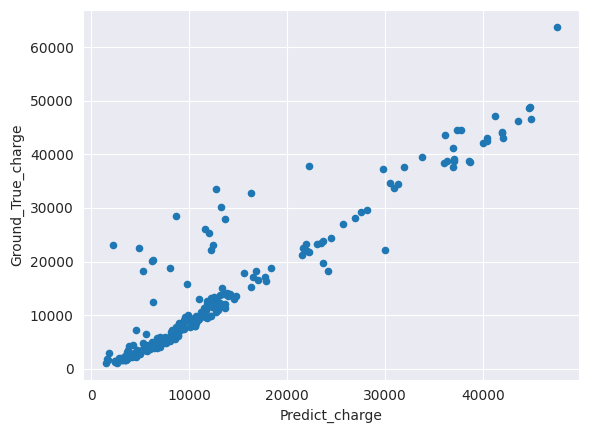

In [ ]:
result_ann.plot.scatter(x='Predict_charge', y='Ground_True_charge')

In [ ]:
model.save('ann_trained.h5')

In [ ]:
# pip freeze keras

In [ ]:
# # import joblib
# filename = 'src/xgb_model_without_tuning.pkl'

# with open(filename,'wb') as f :
#     joblib.dump(xgb_clf,f)

